In [0]:
from keras.applications.vgg16 import VGG16
import matplotlib.image as mpimg
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
K.clear_session()

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet',include_top=False)

In [109]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
from keras.layers import GlobalAveragePooling2D,Activation,Dense
from keras.models import Model

In [0]:
def GAP():
  x = model.output
  x = GlobalAveragePooling2D(name='GAP')(x)
  x = Dense(10, activation='softmax', name='softmax')(x)
  return Model(model.input, x)

In [112]:
model = GAP()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [115]:
from keras.datasets import cifar10
import keras
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train[0:20000]
y_train = y_train[0:20000]
x_test = x_test[0:1000]
y_test = y_test[0:1000]
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

20000 train samples
1000 test samples


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_data=(x_test, y_test))

Train on 20000 samples, validate on 1000 samples
Epoch 1/100
20000/20000 [==============================] - 49s 2ms/step - loss: 1.9859 - accuracy: 0.2002 - val_loss: 1.8465 - val_accuracy: 0.2360
Epoch 2/100
  768/20000 [>.............................] - ETA: 45s - loss: 1.8718 - accuracy: 0.2435

In [0]:
model.save('/content/model/cifar10_model.h5')

In [0]:
# url로 모델 다운받기
import urllib.request
url = 'https://drive.google.com/uc?export=download&id=1TF4hqowBfRiYNUacWaePbnpSLjJ9gjuL'
urllib.request.urlretrieve(url, 'cifar10_model.h5')

In [0]:
model.load_weights('/content/model/cifar10_model.h5')

In [36]:
# url로 이미지 다운받기
import urllib.request
url = 'https://drive.google.com/uc?export=download&id=1TF4hqowBfRiYNUacWaePbnpSLjJ9gjuL'
urllib.request.urlretrieve(url, 'cat_sample.jpg')

('cat_sample.jpg', <http.client.HTTPMessage at 0x7f68dcb58e10>)

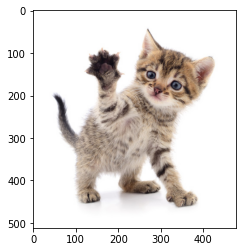

In [37]:
img_path = '/content/cat_sample.jpg'
img= mpimg.imread(img_path)
plt.imshow(img)

In [0]:
# 불러온 이미지를 VGG 네트워크 입력(224,224)에 맞게 변환합니다.
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(224, 224))

In [39]:
# 이미지를 배열로 변환합니다
x = image.img_to_array(img)
print(x.shape)
print(x[0,0,1])

(224, 224, 3)
255.0


In [40]:
# CNN 입력에 맞게 차원을 추가해줍니다.
import numpy as np
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [41]:
# 이미지를 전처리 합니다. 
from keras.applications.vgg16 import preprocess_input
x = preprocess_input(x)
print(x[0,0,1])

[151.061   138.22101 131.32   ]


In [0]:
preds = model.predict(x)

In [44]:
# 1위로 예측된 카테고리의 인덱스를 저장합니다. 
argmax = np.argmax(preds[0])
print(argmax)

8


In [0]:
# 예측값의 인덱스를 저장합니다
output = model.output[:, argmax]

In [46]:
# 마지막 CNN 층을 사용하기 위해 모델 구조를 살펴봅니다.
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [0]:
last_layer = model.get_layer('block5_pool')

In [0]:
# GAP의 Gradient를 구합니다. 
grads = K.gradients(output,last_layer.output)[0]

In [0]:
#이 텐서의 각 입력은 특정 형상 지도 채널에 대한 gradient의 평균 weight다. 이 모양은 (512,)
gap_grads = K.mean(grads, axis=(0, 1, 2))

In [0]:
#샘플 이미지가 주어졌을 때 방금 전 정의한 gap grads와 last layer의 특성 맵 출력을 구합니다
iterate = K.function([model.input],[gap_grads,last_layer.output[0]])

In [0]:
# 고양이가 있는 샘플 이미지를 주입하고 두 개의 넘파이 배열을 얻습니다
grads_value, feature_map = iterate([x])

In [0]:
# 예측 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다
for i in range(512):
     feature_map[:, :, i] *= grads_value[i]

In [0]:
# 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵입니다
heatmap = np.mean(feature_map, axis=-1)

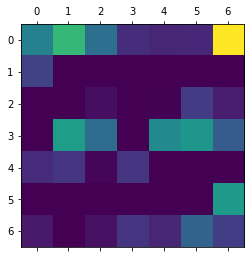

In [69]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

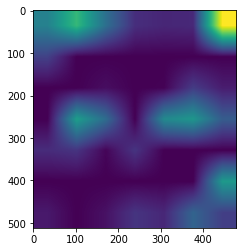

In [70]:
# 이 heatmap을 합성곱해봅니다. 
import cv2
img = cv2.imread(img_path)
# heatmap을 resize
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
plt.imshow(heatmap)

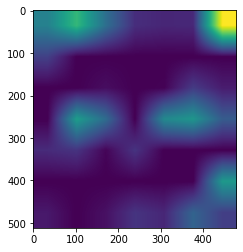

In [71]:
# heatmap을 RGB로 변환 합니다.
heatmap = np.uint8(255 * heatmap)
plt.imshow(heatmap)

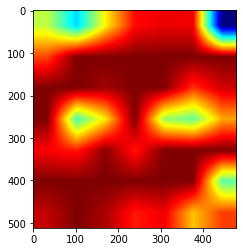

In [72]:
# Apply heatmap to original Image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
plt.imshow(heatmap)
plt.show()
alpha = .8

In [0]:
alpha = .5

In [0]:
superimposed_img = (heatmap * alpha + img)/255.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


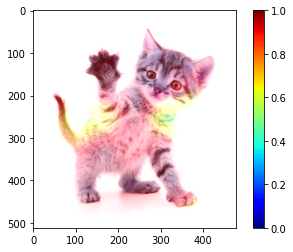

In [77]:
plt.imshow(superimposed_img,'jet')
plt.colorbar()